In [215]:
import pandas as pd
from my_utils import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [213]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [164]:
df = pd.read_csv('lol_datas.csv')

In [165]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25',
       'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'summoner1Id', 'summoner2Id', 'turretKills', 'firstTowerKill',
       'totalMinionsKilled', 'pentaKills', 'championId', 'pickTurn'],
      dtype='object')

In [166]:
df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,item5,item6,summoner1Id,summoner2Id,turretKills,firstTowerKill,totalMinionsKilled,pentaKills,championId,pickTurn
0,KR_6637806460,954,13.15.524.1760,Chu,72,1,Renekton,6379,TOP,100,...,1083,3340,4,12,1,False,108,0,7,1
1,KR_6637806460,954,13.15.524.1760,JDG8,474,2,Karthus,5028,JUNGLE,100,...,0,3340,11,3,0,False,3,0,53,2
2,KR_6637806460,954,13.15.524.1760,gkstjfgml,397,3,Zed,7394,MIDDLE,100,...,0,3364,14,4,0,False,115,0,24,3
3,KR_6637806460,954,13.15.524.1760,myself1,144,4,Ezreal,6331,BOTTOM,100,...,1036,3363,4,7,0,False,163,0,950,4
4,KR_6637806460,954,13.15.524.1760,Spir1TnT,253,5,Rakan,4265,UTILITY,100,...,3067,3364,14,4,0,False,28,0,145,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11305,KR_6883323293,1630,13.24.547.9214,Kanaveee,854,6,Gragas,12341,TOP,200,...,3158,3364,4,12,0,False,158,0,497,6
11306,KR_6883323293,1630,13.24.547.9214,태나시티,100,7,LeeSin,11635,JUNGLE,200,...,0,3340,4,11,0,False,22,0,24,7
11307,KR_6883323293,1630,13.24.547.9214,재선이,72,8,Kled,13556,MIDDLE,200,...,3071,3364,4,14,2,False,148,0,104,8
11308,KR_6883323293,1630,13.24.547.9214,김치나라,325,9,Kalista,12847,BOTTOM,200,...,3153,3363,4,7,3,True,219,0,7,9


In [167]:
tmp = df[['teamPosition', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6']]

In [168]:
tmp_top = tmp[tmp['teamPosition'] == "TOP"]

In [182]:
tmp_top0 = tmp_top[['item0']]

In [183]:
tmp_top1 = tmp_top[['item1']].rename(columns={'item1': 'item0'})

In [184]:
tmp_top2 = tmp_top[['item2']].rename(columns={'item2': 'item0'})

In [185]:
tmp_top3 = tmp_top[['item3']].rename(columns={'item3': 'item0'})

In [186]:
tmp_top4 = tmp_top[['item4']].rename(columns={'item4': 'item0'})

In [187]:
tmp_top5 = tmp_top[['item5']].rename(columns={'item5': 'item0'})

In [192]:
tmp_top_item = pd.concat([tmp_top0, tmp_top1, tmp_top2, tmp_top3, tmp_top4 ,tmp_top5])

In [238]:
df_top_item = pd.DataFrame(tmp_top_item.value_counts().sort_values(ascending=False))

In [159]:
item_tmp_end = pd.read_csv('item_tmp_end.csv')

In [240]:
item_top_merge = pd.merge(df_top_item,item_tmp_end, on='item0')

In [241]:
total_top = item_top_merge.head(3)

In [242]:
total_top = total_top[['name', 'count']]

In [243]:
total_top

,name,count
0,신성한 파괴자,284
1,선체파괴자,253
2,얼어붙은 건틀릿,236


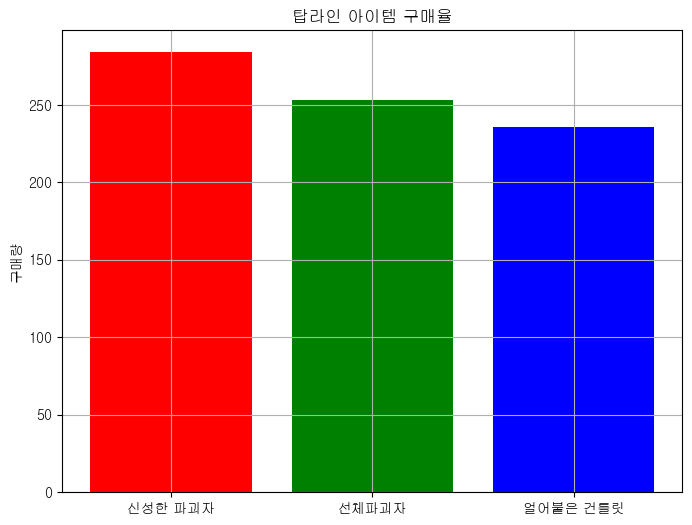

In [244]:
plt.figure(figsize=(8, 6))
plt.bar(total_top['name'], total_top['count'], color=('r','g','b'))
plt.xlabel('')
plt.ylabel('구매량')
plt.title('탑라인 아이템 구매율')
plt.grid()
plt.show()

In [11]:
tmp_JUNGLE = tmp[tmp['teamPosition'] == "JUNGLE"]

In [12]:
tmp_JUNGLE

,teamPosition,item0,item1,item2,item3,item4,item5,item6
1,JUNGLE,1101,1082,3108,3020,3802,0,3340
6,JUNGLE,2420,6655,1082,3020,1052,0,3513
11,JUNGLE,1102,4645,6655,1082,2422,1052,3513
16,JUNGLE,2055,1011,1103,3105,1001,1011,3364
21,JUNGLE,6692,3071,3814,1036,0,3111,3364
...,...,...,...,...,...,...,...,...
11286,JUNGLE,6631,3071,3047,1037,3133,1029,3364
11291,JUNGLE,3089,4645,3157,4636,3020,1026,3364
11296,JUNGLE,6632,1011,3076,0,3742,3047,3364
11301,JUNGLE,3071,6632,6333,0,1036,3047,3364


In [13]:
tmp_JUNGLE0 = tmp_JUNGLE[['item0']]

In [14]:
tmp_JUNGLE1 = tmp_JUNGLE[['item1']].rename(columns={'item1': 'item0'})

In [15]:
tmp_JUNGLE2 = tmp_JUNGLE[['item2']].rename(columns={'item2': 'item0'})

In [16]:
tmp_JUNGLE3 = tmp_JUNGLE[['item3']].rename(columns={'item3': 'item0'})

In [17]:
tmp_JUNGLE4 = tmp_JUNGLE[['item4']].rename(columns={'item4': 'item0'})

In [19]:
tmp_JUNGLE5 = tmp_JUNGLE[['item5']].rename(columns={'item5': 'item0'})

In [24]:
tmp_JUNGLE_item = pd.concat([tmp_JUNGLE0, tmp_JUNGLE1, tmp_JUNGLE2, tmp_JUNGLE3, tmp_JUNGLE4 ,tmp_JUNGLE5])

In [25]:
df_JUNGLE_item = pd.DataFrame(tmp_JUNGLE_item.value_counts().sort_values(ascending=False))

In [26]:
item_tmp_end = pd.read_csv('item_tmp_end.csv')

In [27]:
item_JUNGLE_merge = pd.merge(df_JUNGLE_item,item_tmp_end, on='item0')

In [28]:
total_JUNGLE = item_JUNGLE_merge.head(3)

In [29]:
total_JUNGLE = total_JUNGLE[['name', 'count']]

In [30]:
total_JUNGLE

,name,count
0,칠흑의 양날 도끼,488
1,선혈포식자,389
2,요우무의 유령검,300


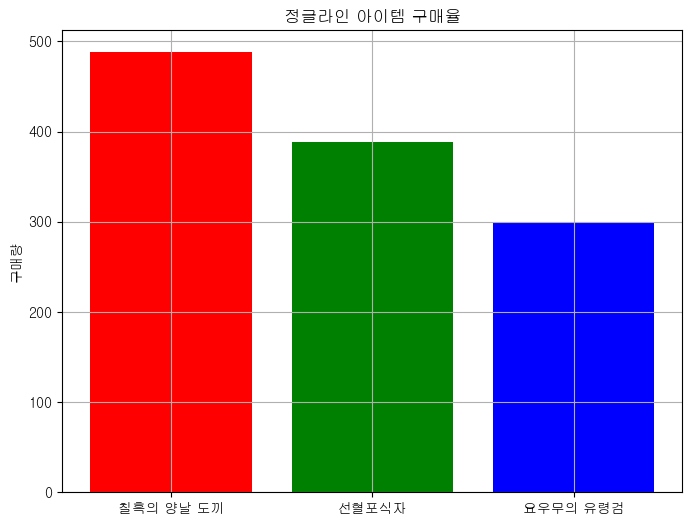

In [31]:
plt.figure(figsize=(8, 6))
plt.bar(total_JUNGLE['name'], total_JUNGLE['count'], color=('r','g','b'))
plt.xlabel('')
plt.ylabel('구매량')
plt.title('정글라인 아이템 구매율')
plt.grid()
plt.show()

In [245]:
tmp_MIDDLE = tmp[tmp['teamPosition'] == "MIDDLE"]

In [246]:
tmp_MIDDLE

,teamPosition,item0,item1,item2,item3,item4,item5,item6
2,MIDDLE,3074,2031,2055,3158,3134,0,3364
7,MIDDLE,6672,2031,1038,1018,1054,3006,3363
12,MIDDLE,1054,6662,3047,3075,0,0,3364
17,MIDDLE,1055,1036,2055,6672,3006,1036,3340
22,MIDDLE,0,3193,3047,3075,6662,3067,3364
...,...,...,...,...,...,...,...,...
11287,MIDDLE,3181,3111,6631,3074,1036,1036,3340
11292,MIDDLE,1011,3143,3047,3068,3076,3084,3364
11297,MIDDLE,6630,3071,6333,3047,1036,1055,3364
11302,MIDDLE,3089,0,4644,3158,1082,4645,3340


In [247]:
tmp_MIDDLE0 = tmp_MIDDLE[['item0']]

In [248]:
tmp_MIDDLE1 = tmp_MIDDLE[['item1']].rename(columns={'item1': 'item0'})

In [249]:
tmp_MIDDLE2 = tmp_MIDDLE[['item2']].rename(columns={'item2': 'item0'})

In [250]:
tmp_MIDDLE3 = tmp_MIDDLE[['item3']].rename(columns={'item3': 'item0'})

In [251]:
tmp_MIDDLE4 = tmp_MIDDLE[['item4']].rename(columns={'item4': 'item0'})

In [252]:
tmp_MIDDLE5 = tmp_MIDDLE[['item5']].rename(columns={'item5': 'item0'})

In [261]:
tmp_MIDDLE_item = pd.concat([tmp_MIDDLE0, tmp_MIDDLE1, tmp_MIDDLE2, tmp_MIDDLE3, tmp_MIDDLE4 ,tmp_MIDDLE5])

In [262]:
df_MIDDLE_item = pd.DataFrame(tmp_MIDDLE_item.value_counts().sort_values(ascending=False))

In [263]:
item_tmp_end = pd.read_csv('item_tmp_end.csv')

In [264]:
item_MIDDLE_merge = pd.merge(df_MIDDLE_item,item_tmp_end, on='item0')

In [265]:
total_MIDDLE = item_MIDDLE_merge.head(3)

In [266]:
total_MIDDLE = total_MIDDLE[['name', 'count']]

In [267]:
total_MIDDLE

,name,count
0,그림자불꽃,535
1,존야의 모래시계,437
2,루덴의 폭풍,386


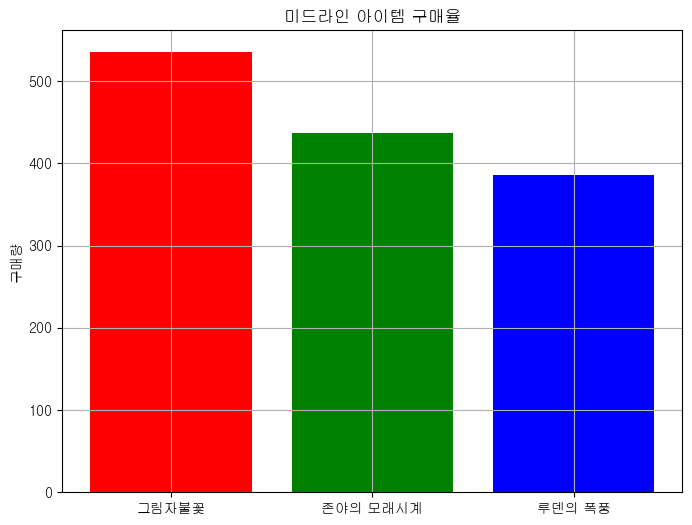

In [269]:
plt.figure(figsize=(8, 6))
plt.bar(total_MIDDLE['name'], total_MIDDLE['count'], color=('r','g','b'))
plt.xlabel('')
plt.ylabel('구매량')
plt.title('미드라인 아이템 구매율')
plt.grid()
plt.show()

In [270]:
tmp_BOTTOM = tmp[tmp['teamPosition'] == "BOTTOM"]

In [271]:
tmp_BOTTOM

,teamPosition,item0,item1,item2,item3,item4,item5,item6
3,BOTTOM,3158,3078,1055,3070,3133,1036,3363
8,BOTTOM,2031,0,6672,1055,3133,3006,3363
13,BOTTOM,3020,3100,3115,1052,0,0,3363
18,BOTTOM,1055,3070,3078,3133,0,2422,3340
23,BOTTOM,6675,3046,3072,2420,1031,3006,3363
...,...,...,...,...,...,...,...,...
11288,BOTTOM,2420,3191,3115,3124,3095,3006,3363
11293,BOTTOM,0,6675,6672,1055,3036,3006,3363
11298,BOTTOM,1055,1037,1042,3153,6672,3006,3340
11303,BOTTOM,3181,3047,3078,3076,3074,1028,3340


In [272]:
tmp_BOTTOM0 = tmp_BOTTOM[['item0']]

In [273]:
tmp_BOTTOM1 = tmp_BOTTOM[['item1']].rename(columns={'item1': 'item0'})

In [274]:
tmp_BOTTOM2 = tmp_BOTTOM[['item2']].rename(columns={'item2': 'item0'})

In [275]:
tmp_BOTTOM3 = tmp_BOTTOM[['item3']].rename(columns={'item3': 'item0'})

In [276]:
tmp_BOTTOM4 = tmp_BOTTOM[['item4']].rename(columns={'item4': 'item0'})

In [277]:
tmp_BOTTOM5 = tmp_BOTTOM[['item5']].rename(columns={'item5': 'item0'})

In [278]:
tmp_BOTTOM_item = pd.concat([tmp_BOTTOM0, tmp_BOTTOM1, tmp_BOTTOM2, tmp_BOTTOM3, tmp_BOTTOM4 ,tmp_BOTTOM5])

In [279]:
df_BOTTOM_item = pd.DataFrame(tmp_BOTTOM_item.value_counts().sort_values(ascending=False))

In [280]:
item_tmp_end = pd.read_csv('item_tmp_end.csv')

In [281]:
item_BOTTOM_merge = pd.merge(df_BOTTOM_item,item_tmp_end, on='item0')

In [282]:
total_BOTTOM = item_BOTTOM_merge.head(3)

In [283]:
total_BOTTOM = total_BOTTOM[['name', 'count']]

In [284]:
total_BOTTOM

,name,count
0,크라켄 학살자,573
1,폭풍갈퀴,487
2,나보리 신속검,429


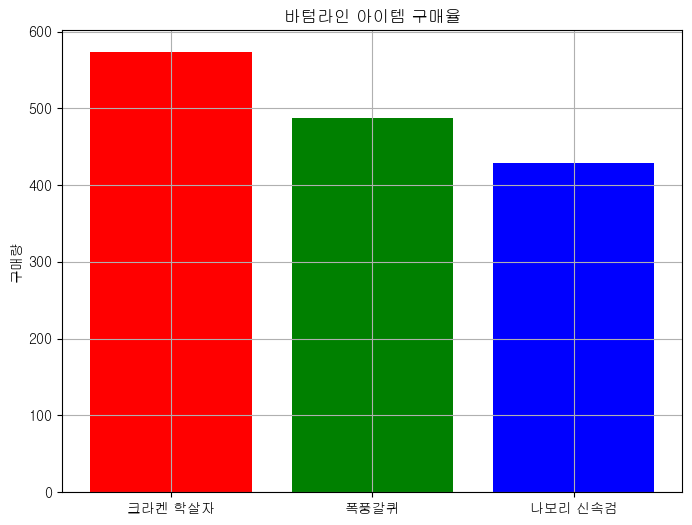

In [285]:
plt.figure(figsize=(8, 6))
plt.bar(total_BOTTOM['name'], total_BOTTOM['count'], color=('r','g','b'))
plt.xlabel('')
plt.ylabel('구매량')
plt.title('바텀라인 아이템 구매율')
plt.grid()
plt.show()

In [286]:
tmp_UTILITY = tmp[tmp['teamPosition'] == "UTILITY"]

In [287]:
tmp_UTILITY

,teamPosition,item0,item1,item2,item3,item4,item5,item6
4,UTILITY,4642,3859,2031,0,3158,3067,3364
9,UTILITY,3047,3859,2055,1011,3105,0,3364
14,UTILITY,2031,3855,2055,3179,3158,3134,3364
19,UTILITY,2031,2055,3859,3023,3047,0,3364
24,UTILITY,6691,3857,0,3179,3158,3814,3364
...,...,...,...,...,...,...,...,...
11289,UTILITY,2055,3860,6667,3158,3023,3076,3364
11294,UTILITY,3860,2055,3076,6667,1011,3117,3364
11299,UTILITY,3158,3179,3134,3857,2055,6691,3363
11304,UTILITY,4636,3853,3041,3117,4630,1026,3363


In [288]:
tmp_UTILITY0 = tmp_UTILITY[['item0']]

In [289]:
tmp_UTILITY1 = tmp_UTILITY[['item1']].rename(columns={'item1': 'item0'})

In [290]:
tmp_UTILITY2 = tmp_UTILITY[['item2']].rename(columns={'item2': 'item0'})

In [291]:
tmp_UTILITY3 = tmp_UTILITY[['item3']].rename(columns={'item3': 'item0'})

In [292]:
tmp_UTILITY4 = tmp_UTILITY[['item4']].rename(columns={'item4': 'item0'})

In [293]:
tmp_UTILITY5 = tmp_UTILITY[['item5']].rename(columns={'item5': 'item0'})

In [294]:
tmp_UTILITY_item = pd.concat([tmp_UTILITY0, tmp_UTILITY1, tmp_UTILITY2, tmp_UTILITY3, tmp_UTILITY4 ,tmp_UTILITY5])

In [295]:
df_UTILITY_item = pd.DataFrame(tmp_UTILITY_item.value_counts().sort_values(ascending=False))

In [296]:
item_tmp_end = pd.read_csv('item_tmp_end.csv')

In [297]:
item_UTILITY_merge = pd.merge(df_UTILITY_item,item_tmp_end, on='item0')

In [298]:
total_UTILITY = item_UTILITY_merge.head(3)

In [299]:
total_UTILITY = total_UTILITY[['name', 'count']]

In [300]:
total_UTILITY

,name,count
0,슈렐리아의 군가,470
1,광휘의 미덕,402
2,그림자 검,239


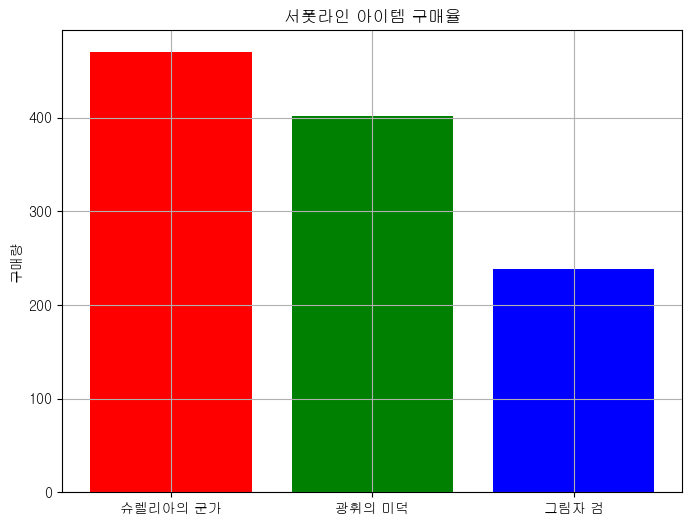

In [301]:
plt.figure(figsize=(8, 6))
plt.bar(total_UTILITY['name'], total_UTILITY['count'], color=('r','g','b'))
plt.xlabel('')
plt.ylabel('구매량')
plt.title('서폿라인 아이템 구매율')
plt.grid()
plt.show()